# Objective: create best teams with medalists: re-run metaheuristcs on 6 individual medalists

In [1]:
import pandas as pd
import numpy as np

In [2]:
iaa24 = pd.read_csv('../Combine_Data/women/iaa2024.csv')
usa = iaa24[iaa24['Nation'] == 'USA']

In [3]:
df1 = pd.read_csv('../Cleaning/USOPC/usa_women_apparatus.csv')


In [4]:
df = df1.groupby('Name').sum().reset_index()

In [5]:
data = {
    'Method': ['Variable Neighborhood Search (VNS)', 'Variable Neighborhood Search (VNS)', 'Hyper-Heuristics', 'Hyper-Heuristics', 'Tabu Search', 'Tabu Search', 'brute force', 'brute force', 'Stochastic control', 'Stochastic control'],
    'IAA/Apparatus': ['IAA', 'Apparatus', 'IAA', 'Apparatus', 'IAA', 'Apparatus', 'IAA', 'Apparatus', 'IAA', 'Apparatus'],
    'Selected Athletes': [['shilese jones', 'simone biles', 'jordan chiles', 'jade carey'], ['shilese jones', 'simone biles', 'jade carey', 'kayla dicello'], ['skye blakely', 'jade carey', 'shilese jones', 'simone biles'], ['simone biles', 'kaylen morgan', 'jordan chiles', 'shilese jones'], ['jade carey', 'jordan chiles', 'shilese jones', 'simone biles'], ['konnor mcclain', 'jade carey', 'simone biles', 'shilese jones'], ['jade carey', 'jordan chiles', 'shilese jones', 'simone biles'], ['addison fatta', 'jade carey', 'shilese jones', 'simone biles'], ['jade carey', 'jordan chiles', 'joscelyn roberson', 'simone biles'], ['addison fatta', 'annalisa milton', 'chloe cho', 'kelise woolford']],
    'Score': [171.47074999999998, 169.51021666666668, 169.963, 168.42235, 171.33725, 170.79811666666666, 169.96300000000002, 169.12011666666666, 156.9955, 141.70375]
}

In [6]:
df = pd.DataFrame(data)
df


,Method,IAA/Apparatus,Selected Athletes,Score
0,Variable Neighborhood Search (VNS),IAA,"[shilese jones, simone biles, jordan chiles, j...",171.470750
1,Variable Neighborhood Search (VNS),Apparatus,"[shilese jones, simone biles, jade carey, kayl...",169.510217
2,Hyper-Heuristics,IAA,"[skye blakely, jade carey, shilese jones, simo...",169.963000
3,Hyper-Heuristics,Apparatus,"[simone biles, kaylen morgan, jordan chiles, s...",168.422350
4,Tabu Search,IAA,"[jade carey, jordan chiles, shilese jones, sim...",171.337250
5,Tabu Search,Apparatus,"[konnor mcclain, jade carey, simone biles, shi...",170.798117
6,brute force,IAA,"[jade carey, jordan chiles, shilese jones, sim...",169.963000
7,brute force,Apparatus,"[addison fatta, jade carey, shilese jones, sim...",169.120117
8,Stochastic control,IAA,"[jade carey, jordan chiles, joscelyn roberson,...",156.995500
9,Stochastic control,Apparatus,"[addison fatta, annalisa milton, chloe cho, ke...",141.703750


In [7]:
# Extract unique athletes
athletes = list(set(athlete for athletes_list in df['Selected Athletes'] for athlete in athletes_list))

# Create columns for each athlete
for athlete in athletes:
    df[athlete] = df['Selected Athletes'].apply(lambda x: 1 if athlete in x else 0)

# Calculate the sum for each athlete column
athlete_sums = df.groupby('Method')[athletes].sum()

athlete_sums


,simone biles,joscelyn roberson,kayla dicello,chloe cho,annalisa milton,shilese jones,konnor mcclain,skye blakely,kaylen morgan,jordan chiles,jade carey,addison fatta,kelise woolford
Method,,,,,,,,,,,,,
Hyper-Heuristics,2,0,0,0,0,2,0,1,1,1,1,0,0
Stochastic control,1,1,0,1,1,0,0,0,0,1,1,1,1
Tabu Search,2,0,0,0,0,2,1,0,0,1,2,0,0
Variable Neighborhood Search (VNS),2,0,1,0,0,2,0,0,0,1,2,0,0
brute force,2,0,0,0,0,2,0,0,0,1,2,1,0


In [8]:

sum_row = athlete_sums.sum(axis=0)

# Convert the sum row to a DataFrame
sum_df = pd.DataFrame([sum_row], columns=athlete_sums.columns)

# Concatenate the sum row with the original DataFrame
athlete_sums = pd.concat([athlete_sums, sum_df], ignore_index=False)

athlete_sums = athlete_sums.reset_index(drop=False)

In [9]:
athlete_sums

,index,simone biles,joscelyn roberson,kayla dicello,chloe cho,annalisa milton,shilese jones,konnor mcclain,skye blakely,kaylen morgan,jordan chiles,jade carey,addison fatta,kelise woolford
0,Hyper-Heuristics,2,0,0,0,0,2,0,1,1,1,1,0,0
1,Stochastic control,1,1,0,1,1,0,0,0,0,1,1,1,1
2,Tabu Search,2,0,0,0,0,2,1,0,0,1,2,0,0
3,Variable Neighborhood Search (VNS),2,0,1,0,0,2,0,0,0,1,2,0,0
4,brute force,2,0,0,0,0,2,0,0,0,1,2,1,0
5,0,9,1,1,1,1,8,1,1,1,5,8,2,1


In [10]:
athlete_sums=athlete_sums.T

In [11]:
df=athlete_sums.copy()

In [12]:
df

,0,1,2,3,4,5
index,Hyper-Heuristics,Stochastic control,Tabu Search,Variable Neighborhood Search (VNS),brute force,0
simone biles,2,1,2,2,2,9
joscelyn roberson,0,1,0,0,0,1
kayla dicello,0,0,0,1,0,1
chloe cho,0,1,0,0,0,1
annalisa milton,0,1,0,0,0,1
shilese jones,2,0,2,2,2,8
konnor mcclain,0,0,1,0,0,1
skye blakely,1,0,0,0,0,1
kaylen morgan,1,0,0,0,0,1


In [13]:
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=False)


In [14]:
df

index,index,Hyper-Heuristics,Stochastic control,Tabu Search,Variable Neighborhood Search (VNS),brute force,0
0,simone biles,2,1,2,2,2,9
1,joscelyn roberson,0,1,0,0,0,1
2,kayla dicello,0,0,0,1,0,1
3,chloe cho,0,1,0,0,0,1
4,annalisa milton,0,1,0,0,0,1
5,shilese jones,2,0,2,2,2,8
6,konnor mcclain,0,0,1,0,0,1
7,skye blakely,1,0,0,0,0,1
8,kaylen morgan,1,0,0,0,0,1
9,jordan chiles,1,1,1,1,1,5


In [15]:
df.columns

Index([                             'index',
                         'Hyper-Heuristics',
                       'Stochastic control',
                              'Tabu Search',
       'Variable Neighborhood Search (VNS)',
                              'brute force',
                                          0],
      dtype='object', name='index')

In [243]:

df = df.rename(columns={'index': 'Name', 0: 'sum'})

In [244]:
df

index,Name,Hyper-Heuristics,Stochastic control,Tabu Search,Variable Neighborhood Search (VNS),brute force,sum
0,jordan chiles,1,1,1,1,1,5
1,simone biles,2,1,2,2,2,9
2,jade carey,1,1,2,2,2,8
3,skye blakely,1,0,0,0,0,1
4,joscelyn roberson,0,1,0,0,0,1
5,addison fatta,0,1,0,0,1,2
6,annalisa milton,0,1,0,0,0,1
7,kaylen morgan,1,0,0,0,0,1
8,konnor mcclain,0,0,1,0,0,1
9,chloe cho,0,1,0,0,0,1


In [245]:
df = df.sort_values(by='sum', ascending=False)

In [246]:
df

index,Name,Hyper-Heuristics,Stochastic control,Tabu Search,Variable Neighborhood Search (VNS),brute force,sum
1,simone biles,2,1,2,2,2,9
2,jade carey,1,1,2,2,2,8
12,shilese jones,2,0,2,2,2,8
0,jordan chiles,1,1,1,1,1,5
5,addison fatta,0,1,0,0,1,2
3,skye blakely,1,0,0,0,0,1
4,joscelyn roberson,0,1,0,0,0,1
6,annalisa milton,0,1,0,0,0,1
7,kaylen morgan,1,0,0,0,0,1
8,konnor mcclain,0,0,1,0,0,1


In [247]:
df=df.drop(columns=['Hyper-Heuristics', 'Stochastic control', 'Tabu Search',
                   'Variable Neighborhood Search (VNS)', 'brute force'])

In [249]:
df

index,Name,sum
1,simone biles,9
2,jade carey,8
12,shilese jones,8
0,jordan chiles,5
5,addison fatta,2
3,skye blakely,1
4,joscelyn roberson,1
6,annalisa milton,1
7,kaylen morgan,1
8,konnor mcclain,1


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 1 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    13 non-null     object
 1   sum     13 non-null     object
dtypes: object(2)
memory usage: 312.0+ bytes


In [251]:
df['Name'].unique()

array(['simone biles', 'jade carey', 'shilese jones', 'jordan chiles',
       'addison fatta', 'skye blakely', 'joscelyn roberson',
       'annalisa milton', 'kaylen morgan', 'konnor mcclain', 'chloe cho',
       'kelise woolford', 'kayla dicello'], dtype=object)

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 1 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    13 non-null     object
 1   sum     13 non-null     object
dtypes: object(2)
memory usage: 312.0+ bytes


In [253]:
iaa24

,Rank,Athlete,Nation,VT,UB,BB,FX,AA,round,year
0,1,rebeca andrade,BRA,15.066,14.666,13.400,14.200,57.332,qual,2022
1,2,shilese jones,USA,14.200,14.566,13.200,13.800,55.766,qual,2022
2,3,jade carey,USA,14.600,13.333,13.133,14.066,55.132,qual,2022
3,4,martina maggio,ITA,14.200,14.200,12.900,13.500,54.800,qual,2022
4,5,jessica gadirova,none,14.400,13.166,12.933,14.100,54.599,qual,2022
...,...,...,...,...,...,...,...,...,...,...
816,29,gabriella van frayen,none,12.950,0.000,11.300,12.100,36.350,final,2023
817,30,myli lew,none,12.950,13.650,0.000,0.000,26.600,final,2023
818,31,skye blakely,none,0.000,13.150,13.400,0.000,26.500,final,2023
819,32,tiana sumanasekera,none,0.000,12.900,12.600,0.000,25.500,final,2023


In [17]:
usa=iaa24.drop(columns=['round', 'year', 'Nation', 'Rank', 'AA'])

In [18]:
iaa = usa.groupby('Athlete').mean().reset_index()

In [19]:
# medalist
selected_athletes =['ashlee sullivan', 'simone biles', 'joscelyn roberson',
       'shilese jones', 'zoe miller', 'jordan chiles']

# Create a new DataFrame with selected athletes
iaa = iaa[iaa['Athlete'].isin(selected_athletes)]

iaa

,Athlete,VT,UB,BB,FX
53,ashlee sullivan,13.750000,12.600000,13.35000,13.100000
173,jordan chiles,14.466000,14.066000,11.36600,14.100000
175,joscelyn roberson,13.788667,6.866667,8.90000,13.277667
343,shilese jones,14.224750,14.649500,13.62475,13.700000
346,simone biles,15.183000,14.366500,14.49950,14.583000
402,zoe miller,13.650000,13.500000,11.75000,12.525000


In [257]:
iaa['Athlete'].value_counts()

Athlete
ashlee sullivan      1
jordan chiles        1
joscelyn roberson    1
shilese jones        1
simone biles         1
zoe miller           1
Name: count, dtype: int64

In [261]:
df1

,Athlete,VT,UB,BB,FX
53,ashlee sullivan,13.750000,12.600000,13.35000,13.100000
173,jordan chiles,14.466000,14.066000,11.36600,14.100000
175,joscelyn roberson,13.788667,6.866667,8.90000,13.277667
343,shilese jones,14.224750,14.649500,13.62475,13.700000
346,simone biles,15.183000,14.366500,14.49950,14.583000
402,zoe miller,13.650000,13.500000,11.75000,12.525000


In [262]:
df1 = pd.read_csv('../Cleaning/USOPC/usa_women_apparatus.csv')


In [263]:
app = df1.groupby('Name').sum().reset_index()

In [264]:
# medalist
selected_athletes = ['ashlee sullivan', 'simone biles', 'joscelyn roberson',
       'shilese jones', 'zoe miller', 'jordan chiles']

# Create a new DataFrame with selected athletes
app = app[app['Name'].isin(selected_athletes)]



In [265]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 6 to 55
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    6 non-null      object 
 1   BB      6 non-null      float64
 2   FX      6 non-null      float64
 3   UB      6 non-null      float64
 4   VT      6 non-null      float64
dtypes: float64(4), object(1)
memory usage: 288.0+ bytes


In [266]:
iaa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 53 to 402
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Athlete  6 non-null      object 
 1   VT       6 non-null      float64
 2   UB       6 non-null      float64
 3   BB       6 non-null      float64
 4   FX       6 non-null      float64
dtypes: float64(4), object(1)
memory usage: 288.0+ bytes


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 1 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    13 non-null     object
 1   sum     13 non-null     object
dtypes: object(2)
memory usage: 312.0+ bytes


In [268]:
# Updated data without brute-force search
new_data = {
    'Individual_Medal':['ashlee sullivan', 'simone biles','joscelyn roberson',
         'shilese jones', 'zoe miller', 'jordan chiles']}

# Create DataFrame
medal = pd.DataFrame(new_data)




In [269]:
medal['Individual_Medal'].unique()

array(['ashlee sullivan', 'simone biles', 'joscelyn roberson',
       'shilese jones', 'zoe miller', 'jordan chiles'], dtype=object)

In [270]:
df1=iaa.copy()

In [271]:
df2=app.copy()

# VNS

## IAA
Selected Athletes:
['jordan chiles' 'shilese jones' 'simone biles' 'ashlee sullivan']
Total Score:
169.67175


## app

Selected Athletes (Best Seed):
['shilese jones' 'jordan chiles' 'simone biles' 'joscelyn roberson']
Total Score (Best Seed):
168.99812500000002


# Hyper-Heuristics

### IAA
Best Selection: ['jordan chiles' 'simone biles' 'shilese jones' 'zoe miller']
Best Score: 168.829


## APP

Best Selection: ['shilese jones' 'jordan chiles' 'joscelyn roberson' 'simone biles']
Best Score: 168.42235

# Tabu Search
## IAA

Selected Athletes:
['simone biles' 'jordan chiles' 'shilese jones' 'ashlee sullivan']
Total Score:
170.81300000000002

## App

Selected Athletes:
['joscelyn roberson' 'zoe miller' 'simone biles' 'shilese jones']
Total Score:
169.71908928571426

# brute force

## IAA

Selected Athletes:
['ashlee sullivan', 'jordan chiles', 'shilese jones', 'simone biles']
Maximum Score:
168.829

## App
Selected Athletes:
['ashlee sullivan', 'jordan chiles', 'shilese jones', 'simone biles']
Maximum Score:
168.42235


---

# VNS

## IAA
Selected Athletes:
['jordan chiles' 'shilese jones' 'simone biles' 'ashlee sullivan']
Total Score:
169.67175


## app

Selected Athletes (Best Seed):
['shilese jones' 'jordan chiles' 'simone biles' 'joscelyn roberson']
Total Score (Best Seed):
168.99812500000002

# IAA
Selected Athletes:
['jordan chiles' 'shilese jones' 'simone biles' 'ashlee sullivan']
Total Score:
169.67175


In [207]:
import pandas as pd
import numpy as np

df=df1.copy()
# Define the number of athletes to select
num_athletes_to_select = 4

# Define the apparatuses
apparatuses = ['FX', 'UB', 'BB', 'VT']

# Define the neighborhood size
neighborhood_size = 2  # Adjust as needed

# Initialize the solution randomly
selected_athletes = np.random.choice(df['Athlete'], num_athletes_to_select, replace=False)

# Define a function to calculate the total score for a given solution
def calculate_total_score(selected_athletes):
    selected_scores = df[df['Athlete'].isin(selected_athletes)][apparatuses].values
    top_3_scores = np.sum(np.partition(selected_scores, -3)[:, -3:])
    return top_3_scores

# Define the main VNS algorithm
def variable_neighborhood_search(df, num_athletes_to_select, apparatuses, neighborhood_size, num_iterations):
    best_solution = None
    best_score = float('-inf')

    for iteration in range(num_iterations):
        # Shake: Generate a new solution by randomly changing athletes
        current_solution = np.random.choice(df['Athlete'], num_athletes_to_select, replace=False)
        
        for _ in range(neighborhood_size):
            # Local Search: Optimize the solution locally
            current_score = calculate_total_score(current_solution)
            
            # Perturb: Randomly change some athletes in the current solution
            perturbed_solution = np.random.choice(df['Athlete'], num_athletes_to_select, replace=False)
            perturbed_score = calculate_total_score(perturbed_solution)
            
            # Acceptance Criterion: Accept the perturbed solution if it improves the score
            if perturbed_score > current_score:
                current_solution = perturbed_solution
                current_score = perturbed_score

        # Update the best solution if the current one is better
        if current_score > best_score:
            best_solution = current_solution
            best_score = current_score

    return best_solution, best_score

# Run the VNS algorithm
best_solution, best_score = variable_neighborhood_search(df, num_athletes_to_select, apparatuses, neighborhood_size, num_iterations=1000)

# Print the result
print('Selected Athletes:')
print(best_solution)
print('Total Score:')
print(best_score)


Selected Athletes:
['jordan chiles' 'shilese jones' 'simone biles' 'ashlee sullivan']
Total Score:
169.67175


# app

Selected Athletes (Best Seed):
['shilese jones' 'jordan chiles' 'simone biles' 'joscelyn roberson']
Total Score (Best Seed):
168.99812500000002

In [209]:
import pandas as pd
import numpy as np
from tqdm import tqdm 

df=df2.copy()
# Your original code
np.random.seed(42)

# Define the number of athletes to select
num_athletes_to_select = 4

# Define the apparatuses
apparatuses = ['FX', 'UB', 'BB', 'VT']

# Define the neighborhood size
neighborhood_size = 2  # Adjust as needed

# Initialize the solution randomly
selected_athletes = np.random.choice(df['Name'], num_athletes_to_select, replace=False)

# Define a function to calculate the total score for a given solution
def calculate_total_score(selected_athletes):
    selected_scores = df[df['Name'].isin(selected_athletes)][apparatuses].values
    top_3_scores = np.sum(np.partition(selected_scores, -3)[:, -3:])
    return top_3_scores

# Define the main VNS algorithm
def variable_neighborhood_search(df, num_athletes_to_select, apparatuses, neighborhood_size, num_iterations):
    best_solution = None
    best_score = float('-inf')

    for iteration in range(num_iterations):
        # Shake: Generate a new solution by randomly changing athletes
        current_solution = np.random.choice(df['Name'], num_athletes_to_select, replace=False)
        
        for _ in range(neighborhood_size):
            # Local Search: Optimize the solution locally
            current_score = calculate_total_score(current_solution)
            
            # Perturb: Randomly change some athletes in the current solution
            perturbed_solution = np.random.choice(df['Name'], num_athletes_to_select, replace=False)
            perturbed_score = calculate_total_score(perturbed_solution)
            
            # Acceptance Criterion: Accept the perturbed solution if it improves the score
            if perturbed_score > current_score:
                current_solution = perturbed_solution
                current_score = perturbed_score

        # Update the best solution if the current one is better
        if current_score > best_score:
            best_solution = current_solution
            best_score = current_score

    return best_solution, best_score

# Run the VNS algorithm
best_solution, best_score = variable_neighborhood_search(df, num_athletes_to_select, apparatuses, neighborhood_size, num_iterations=1000)

# Print the result
print('Selected Athletes:')
print(best_solution)
print('Total Score:')
print(best_score)

# Additional code for iterating through seed values
num_iterations_seed = 100

# Initialize variables to store the best result
best_solution_seed = None
best_score_seed = float('-inf')
best_seed = None

for seed in tqdm(range(num_iterations_seed), desc="Running VNS with Different Seeds"):
    np.random.seed(seed)

    # Run the VNS algorithm
    current_solution_seed, current_score_seed = variable_neighborhood_search(df, num_athletes_to_select, apparatuses, neighborhood_size, num_iterations=1000)

    # Update the best result if the current one is better
    if current_score_seed > best_score_seed:
        best_solution_seed = current_solution_seed
        best_score_seed = current_score_seed
        best_seed = seed

# Print the best result
print('Best Seed:', best_seed)
print('Selected Athletes (Best Seed):')
print(best_solution_seed)
print('Total Score (Best Seed):')
print(best_score_seed)


Selected Athletes:
['jordan chiles' 'simone biles' 'joscelyn roberson' 'shilese jones']
Total Score:
168.99812500000002


Running VNS with Different Seeds: 100%|███████| 100/100 [04:54<00:00,  2.94s/it]

Best Seed: 0
Selected Athletes (Best Seed):
['shilese jones' 'jordan chiles' 'simone biles' 'joscelyn roberson']
Total Score (Best Seed):
168.99812500000002


# Hyper-Heuristics

### IAA
Best Selection: ['jordan chiles' 'simone biles' 'shilese jones' 'zoe miller']
Best Score: 168.829


## APP

Best Selection: ['shilese jones' 'jordan chiles' 'joscelyn roberson' 'simone biles']
Best Score: 168.42235


## IAA

In [210]:
import pandas as pd
import numpy as np

df=df1.copy()

# Define the number of athletes to select
num_athletes_to_select = 4

# Define the apparatuses
apparatuses = ['FX', 'VT', 'BB', 'UB']

# Initialize variables to store the best solution
best_score = 0
best_selection = None

# Define the number of iterations for the hyper-heuristic
num_iterations = 1000

for _ in range(num_iterations):
    # Randomly select 4 athletes
    selected_athletes = np.random.choice(df['Athlete'], size=num_athletes_to_select, replace=False)

    # Calculate the score for the current selection
    scores = df[df['Athlete'].isin(selected_athletes)][apparatuses].sum(axis=1).nlargest(3).sum()

    # Update the best solution if the current one is better
    if scores > best_score:
        best_score = scores
        best_selection = selected_athletes

# Print the best selection and score
print("Best Selection:", best_selection)
print("Best Score:", best_score)


Best Selection: ['jordan chiles' 'simone biles' 'shilese jones' 'zoe miller']
Best Score: 168.829


## App

In [211]:
import pandas as pd
import numpy as np

df=df2.copy()
# Define the number of athletes to select
num_athletes_to_select = 4

# Define the apparatuses
apparatuses = ['FX', 'VT', 'BB', 'UB']

# Initialize variables to store the best solution
best_score = 0
best_selection = None

# Define the number of iterations for the hyper-heuristic
num_iterations = 1000

for _ in range(num_iterations):
    # Randomly select 4 athletes
    selected_athletes = np.random.choice(df['Name'], size=num_athletes_to_select, replace=False)

    # Calculate the score for the current selection
    scores = df[df['Name'].isin(selected_athletes)][apparatuses].sum(axis=1).nlargest(3).sum()

    # Update the best solution if the current one is better
    if scores > best_score:
        best_score = scores
        best_selection = selected_athletes

# Print the best selection and score
print("Best Selection:", best_selection)
print("Best Score:", best_score)


Best Selection: ['shilese jones' 'jordan chiles' 'joscelyn roberson' 'simone biles']
Best Score: 168.42235


# Tabu Search
## IAA

Selected Athletes:
['simone biles' 'jordan chiles' 'shilese jones' 'ashlee sullivan']
Total Score:
170.81300000000002

## App

Selected Athletes:
['joscelyn roberson' 'zoe miller' 'simone biles' 'shilese jones']
Total Score:
169.71908928571426



## IAA

Selected Athletes:
['simone biles' 'jordan chiles' 'shilese jones' 'ashlee sullivan']
Total Score:
170.81300000000002



In [212]:
import pandas as pd
import numpy as np

df= df1.copy()
def calculate_score(selected_athletes, df):
    """
    Calculate the total score for a given set of selected athletes.
    """
    # Select rows corresponding to the chosen athletes
    selected_df = df[df['Athlete'].isin(selected_athletes)]

    # Calculate the sum of the top 3 scores for each apparatus
    apparatus_scores = selected_df.drop(['Athlete'], axis=1)
    top_3_sum = apparatus_scores.apply(lambda row: sum(sorted(row, reverse=True)[:3]), axis=0)

    # Calculate the total score
    total_score = top_3_sum.sum()

    return total_score




def tabu_search(df, num_athletes_to_select, tabu_size, max_iterations):
    # Initialize the solution with a random set of athletes
    available_athletes = df['Athlete'].tolist()
    current_solution = np.random.choice(available_athletes, size=num_athletes_to_select, replace=False)
    best_solution = current_solution.copy()
    best_score = calculate_score(best_solution, df)

    # Initialize tabu list
    tabu_list = []

    # Main Tabu Search loop
    for iteration in range(max_iterations):
        # Generate neighbors by swapping athletes
        neighbors = []
        for i in range(num_athletes_to_select):
            for athlete in df['Athlete']:
                if athlete not in current_solution:
                    neighbor = current_solution.copy()
                    neighbor[i] = athlete
                    neighbors.append(neighbor)

                    
                    
                best_neighbor = None
        best_neighbor_score = float('-inf')

        for neighbor in neighbors:
            neighbor_score = calculate_score(neighbor, df)

            # Convert the NumPy array to a tuple
            neighbor_tuple = tuple(neighbor)

            if neighbor_score > best_neighbor_score and neighbor_tuple not in tabu_list:
                best_neighbor = neighbor
                best_neighbor_score = neighbor_score

        # Update current solution and tabu list
        current_solution = best_neighbor
        tabu_list.append(tuple(best_neighbor))

        # Keep the tabu list size within the specified limit
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

        # Update the best solution if a better one is found
        if best_neighbor_score > best_score:
            best_solution = best_neighbor
            best_score = best_neighbor_score

        # Print progress
        print(f"Iteration {iteration + 1}, Best Score: {best_score}")

    return best_solution, best_score

# Assuming df is your DataFrame
# df = ...

# Set parameters
num_athletes_to_select = 4
tabu_size = 10
max_iterations = 100

# Perform Tabu Search
best_solution, best_score = tabu_search(df, num_athletes_to_select, tabu_size, max_iterations)

# Print the selected athletes and the corresponding score
print('Selected Athletes:')
print(best_solution)
print('Total Score:')
print(best_score)

      

Iteration 1, Best Score: 170.81300000000002
Iteration 2, Best Score: 170.81300000000002
Iteration 3, Best Score: 170.81300000000002
Iteration 4, Best Score: 170.81300000000002
Iteration 5, Best Score: 170.81300000000002
Iteration 6, Best Score: 170.81300000000002
Iteration 7, Best Score: 170.81300000000002
Iteration 8, Best Score: 170.81300000000002
Iteration 9, Best Score: 170.81300000000002
Iteration 10, Best Score: 170.81300000000002
Iteration 11, Best Score: 170.81300000000002
Iteration 12, Best Score: 170.81300000000002
Iteration 13, Best Score: 170.81300000000002
Iteration 14, Best Score: 170.81300000000002
Iteration 15, Best Score: 170.81300000000002
Iteration 16, Best Score: 170.81300000000002
Iteration 17, Best Score: 170.81300000000002
Iteration 18, Best Score: 170.81300000000002
Iteration 19, Best Score: 170.81300000000002
Iteration 20, Best Score: 170.81300000000002
Iteration 21, Best Score: 170.81300000000002
Iteration 22, Best Score: 170.81300000000002
Iteration 23, Best 

## App

Selected Athletes:
['joscelyn roberson' 'zoe miller' 'simone biles' 'shilese jones']
Total Score:
169.71908928571426

In [213]:
import pandas as pd
import numpy as np

df=df2.copy()

def calculate_score(selected_athletes, df):
    """
    Calculate the total score for a given set of selected athletes.
    """
    # Select rows corresponding to the chosen athletes
    selected_df = df[df['Name'].isin(selected_athletes)]

    # Calculate the sum of the top 3 scores for each apparatus
    apparatus_scores = selected_df.drop(['Name'], axis=1)
    top_3_sum = apparatus_scores.apply(lambda row: sum(sorted(row, reverse=True)[:3]), axis=0)

    # Calculate the total score
    total_score = top_3_sum.sum()

    return total_score




def tabu_search(df, num_athletes_to_select, tabu_size, max_iterations):
    # Initialize the solution with a random set of athletes
    available_athletes = df['Name'].tolist()
    current_solution = np.random.choice(available_athletes, size=num_athletes_to_select, replace=False)
    best_solution = current_solution.copy()
    best_score = calculate_score(best_solution, df)

    # Initialize tabu list
    tabu_list = []

    # Main Tabu Search loop
    for iteration in range(max_iterations):
        # Generate neighbors by swapping athletes
        neighbors = []
        for i in range(num_athletes_to_select):
            for athlete in df['Name']:
                if athlete not in current_solution:
                    neighbor = current_solution.copy()
                    neighbor[i] = athlete
                    neighbors.append(neighbor)

                    
                    
                best_neighbor = None
        best_neighbor_score = float('-inf')

        for neighbor in neighbors:
            neighbor_score = calculate_score(neighbor, df)

            # Convert the NumPy array to a tuple
            neighbor_tuple = tuple(neighbor)

            if neighbor_score > best_neighbor_score and neighbor_tuple not in tabu_list:
                best_neighbor = neighbor
                best_neighbor_score = neighbor_score

        # Update current solution and tabu list
        current_solution = best_neighbor
        tabu_list.append(tuple(best_neighbor))

        # Keep the tabu list size within the specified limit
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

        # Update the best solution if a better one is found
        if best_neighbor_score > best_score:
            best_solution = best_neighbor
            best_score = best_neighbor_score

        # Print progress
        print(f"Iteration {iteration + 1}, Best Score: {best_score}")

    return best_solution, best_score

# Assuming df is your DataFrame
# df = ...

# Set parameters
num_athletes_to_select = 4
tabu_size = 10
max_iterations = 100

# Perform Tabu Search
best_solution, best_score = tabu_search(df, num_athletes_to_select, tabu_size, max_iterations)

# Print the selected athletes and the corresponding score
print('Selected Athletes:')
print(best_solution)
print('Total Score:')
print(best_score)

      

Iteration 1, Best Score: 167.70888928571426
Iteration 2, Best Score: 169.71908928571426
Iteration 3, Best Score: 169.71908928571426
Iteration 4, Best Score: 169.71908928571426
Iteration 5, Best Score: 169.71908928571426
Iteration 6, Best Score: 169.71908928571426
Iteration 7, Best Score: 169.71908928571426
Iteration 8, Best Score: 169.71908928571426
Iteration 9, Best Score: 169.71908928571426
Iteration 10, Best Score: 169.71908928571426
Iteration 11, Best Score: 169.71908928571426
Iteration 12, Best Score: 169.71908928571426
Iteration 13, Best Score: 169.71908928571426
Iteration 14, Best Score: 169.71908928571426
Iteration 15, Best Score: 169.71908928571426
Iteration 16, Best Score: 169.71908928571426
Iteration 17, Best Score: 169.71908928571426
Iteration 18, Best Score: 169.71908928571426
Iteration 19, Best Score: 169.71908928571426
Iteration 20, Best Score: 169.71908928571426
Iteration 21, Best Score: 169.71908928571426
Iteration 22, Best Score: 169.71908928571426
Iteration 23, Best 

# brute force

## IAA

Selected Athletes:
['ashlee sullivan', 'jordan chiles', 'shilese jones', 'simone biles']
Maximum Score:
168.829

## App
Selected Athletes:
['ashlee sullivan', 'jordan chiles', 'shilese jones', 'simone biles']
Maximum Score:
168.42235


## IAA

Selected Athletes:
['ashlee sullivan', 'jordan chiles', 'shilese jones', 'simone biles']
Maximum Score:
168.829



In [214]:
import pandas as pd
import itertools
from tqdm import tqdm

df=df1.copy()
num_athletes = 4
apparatuses = ['VT', 'UB', 'BB', 'FX']

# Generate all combinations of athletes
athlete_combinations = list(itertools.combinations(df['Athlete'], num_athletes))

# variables to store maximum score and athletes
max_score = 0
selected_athletes = []

# tqdm progress bar
progress_bar = tqdm(total=len(athlete_combinations))

# Iterate through combination of athletes
for combination in athlete_combinations:
    # Generate all possible combinations of apparatuses for current athlete combination
    apparatus_combinations = list(itertools.permutations(apparatuses, num_athletes))

    # Iterate through each combination of apparatuses
    for apparatus_combination in apparatus_combinations:
        # Calculate the sum of top three scores for current apparatus combination
        score = df[df['Athlete'].isin(combination)][list(apparatus_combination)].sum(axis=1).nlargest(3).sum()

        # Update maximum score and selected athletes if a higher score is found
        if score > max_score:
            max_score = score
            selected_athletes = list(combination)

    # Update progress bar
    progress_bar.update(1)

progress_bar.close()

print('Selected Athletes:')
print(selected_athletes)
print('Maximum Score:')
print(max_score)


100%|███████████████████████████████████████████| 15/15 [00:00<00:00, 22.95it/s]

Selected Athletes:
['ashlee sullivan', 'jordan chiles', 'shilese jones', 'simone biles']
Maximum Score:
168.829


## App
Selected Athletes:
['ashlee sullivan', 'jordan chiles', 'shilese jones', 'simone biles']
Maximum Score:
168.42235

In [215]:
import pandas as pd
import itertools
from tqdm import tqdm

df=df2.copy()

num_athletes = 4

apparatuses = ['VT', 'UB', 'BB', 'FX']

# Generate all combinations of athletes
athlete_combinations = list(itertools.combinations(df['Name'], num_athletes))

# variables to store maximum score and athletes
max_score = 0
selected_athletes = []

# tqdm progress bar
progress_bar = tqdm(total=len(athlete_combinations))

# Iterate through each combination of athletes
for combination in athlete_combinations:
    # Generate all combinations of apparatuses for current athlete combination
    apparatus_combinations = list(itertools.permutations(apparatuses, num_athletes))

    # Iterate through each combination of apparatuses
    for apparatus_combination in apparatus_combinations:
        # Calculate sum of top three scores for current apparatus combination
        score = df[df['Name'].isin(combination)][list(apparatus_combination)].sum(axis=1).nlargest(3).sum()

        # Update maximum score and selected athletes if a higher score is found
        if score > max_score:
            max_score = score
            selected_athletes = list(combination)

    progress_bar.update(1)

progress_bar.close()

print('Selected Athletes:')
print(selected_athletes)
print('Maximum Score:')
print(max_score)


100%|███████████████████████████████████████████| 15/15 [00:00<00:00, 23.03it/s]

Selected Athletes:
['ashlee sullivan', 'jordan chiles', 'shilese jones', 'simone biles']
Maximum Score:
168.42235


In [98]:
import pandas as pd

data = {
    'Algorithm': ['VNS', 'VNS', 'Hyper-Heuristics', 'Hyper-Heuristics', 'Tabu Search', 'Tabu Search', 'brute force', 'brute force'],
    'Method': ['IAA', 'App', 'IAA', 'App', 'IAA', 'App', 'IAA', 'App'],
    'Athletes': [['jordan chiles', 'shilese jones', 'simone biles', 'ashlee sullivan'], 
                 ['shilese jones', 'jordan chiles', 'simone biles', 'joscelyn roberson'],
                 ['jordan chiles', 'simone biles', 'shilese jones', 'zoe miller'], 
                 ['shilese jones', 'jordan chiles', 'joscelyn roberson', 'simone biles'], 
                 ['simone biles', 'jordan chiles', 'shilese jones', 'ashlee sullivan'], 
                 ['joscelyn roberson', 'zoe miller', 'simone biles', 'shilese jones'], 
                 ['ashlee sullivan', 'jordan chiles', 'shilese jones', 'simone biles'], 
                 ['ashlee sullivan', 'jordan chiles', 'shilese jones', 'simone biles']],
    'Score': [169.67175, 168.99812500000002, 168.829, 168.42235, 170.81300000000002,
                    169.71908928571426, 168.829, 168.42235],

}

df = pd.DataFrame(data)

In [99]:
df

,Algorithm,Method,Athletes,Score
0,VNS,IAA,"[jordan chiles, shilese jones, simone biles, a...",169.671750
1,VNS,App,"[shilese jones, jordan chiles, simone biles, j...",168.998125
2,Hyper-Heuristics,IAA,"[jordan chiles, simone biles, shilese jones, z...",168.829000
3,Hyper-Heuristics,App,"[shilese jones, jordan chiles, joscelyn robers...",168.422350
4,Tabu Search,IAA,"[simone biles, jordan chiles, shilese jones, a...",170.813000
5,Tabu Search,App,"[joscelyn roberson, zoe miller, simone biles, ...",169.719089
6,brute force,IAA,"[ashlee sullivan, jordan chiles, shilese jones...",168.829000
7,brute force,App,"[ashlee sullivan, jordan chiles, shilese jones...",168.422350


In [219]:
iaa

,Athlete,VT,UB,BB,FX
53,ashlee sullivan,13.750000,12.600000,13.35000,13.100000
173,jordan chiles,14.466000,14.066000,11.36600,14.100000
175,joscelyn roberson,13.788667,6.866667,8.90000,13.277667
343,shilese jones,14.224750,14.649500,13.62475,13.700000
346,simone biles,15.183000,14.366500,14.49950,14.583000
402,zoe miller,13.650000,13.500000,11.75000,12.525000


In [220]:
iaa['AA'] = iaa[['VT', 'UB', 'BB', 'FX']].sum(axis=1)

In [221]:
iaa

,Athlete,VT,UB,BB,FX,AA
53,ashlee sullivan,13.750000,12.600000,13.35000,13.100000,52.800
173,jordan chiles,14.466000,14.066000,11.36600,14.100000,53.998
175,joscelyn roberson,13.788667,6.866667,8.90000,13.277667,42.833
343,shilese jones,14.224750,14.649500,13.62475,13.700000,56.199
346,simone biles,15.183000,14.366500,14.49950,14.583000,58.632
402,zoe miller,13.650000,13.500000,11.75000,12.525000,51.425


In [222]:
iaa = iaa.sort_values(by='AA', ascending=False)

In [225]:
iaa['AA'].unique()

array([58.632, 56.199, 53.998, 52.8  , 51.425, 42.833])

In [226]:
sum_values = 58.632 + 56.199 + 53.998
print(sum_values)

168.82899999999998


In [227]:
iaa

,Athlete,VT,UB,BB,FX,AA
346,simone biles,15.183000,14.366500,14.49950,14.583000,58.632
343,shilese jones,14.224750,14.649500,13.62475,13.700000,56.199
173,jordan chiles,14.466000,14.066000,11.36600,14.100000,53.998
53,ashlee sullivan,13.750000,12.600000,13.35000,13.100000,52.800
402,zoe miller,13.650000,13.500000,11.75000,12.525000,51.425
175,joscelyn roberson,13.788667,6.866667,8.90000,13.277667,42.833


In [228]:
iaa['Athlete'].unique()

array(['simone biles', 'shilese jones', 'jordan chiles',
       'ashlee sullivan', 'zoe miller', 'joscelyn roberson'], dtype=object)

final athletes are:'simone biles', 'shilese jones', 'jordan chiles'

medalist still not on team: ashlee sullivan,joscelyn roberson, zoe miller

USA TEAM is: 'simone biles', 'shilese jones', 'jordan chiles', and 2 of the 3 following  ashlee sullivan,joscelyn roberson, zoe miller

In [20]:
iaa

,Athlete,VT,UB,BB,FX
53,ashlee sullivan,13.750000,12.600000,13.35000,13.100000
173,jordan chiles,14.466000,14.066000,11.36600,14.100000
175,joscelyn roberson,13.788667,6.866667,8.90000,13.277667
343,shilese jones,14.224750,14.649500,13.62475,13.700000
346,simone biles,15.183000,14.366500,14.49950,14.583000
402,zoe miller,13.650000,13.500000,11.75000,12.525000


In [22]:
iaa['AA'] = iaa.iloc[:, 1:].sum(axis=1)

In [23]:
iaa

,Athlete,VT,UB,BB,FX,AA
53,ashlee sullivan,13.750000,12.600000,13.35000,13.100000,52.800
173,jordan chiles,14.466000,14.066000,11.36600,14.100000,53.998
175,joscelyn roberson,13.788667,6.866667,8.90000,13.277667,42.833
343,shilese jones,14.224750,14.649500,13.62475,13.700000,56.199
346,simone biles,15.183000,14.366500,14.49950,14.583000,58.632
402,zoe miller,13.650000,13.500000,11.75000,12.525000,51.425


In [24]:
58.632+56.199+53.998

168.82899999999998

'simone biles', 'shilese jones', 'jordan chiles = 168.82899

In [25]:
athletes_to_remove = ['simone biles', 'shilese jones', 'jordan chiles']

# Remove rows corresponding to specified athletes
iaa = iaa[~iaa['Athlete'].isin(athletes_to_remove)]



In [97]:
iaa

,Athlete,VT,UB,BB,FX,AA
53,ashlee sullivan,13.750000,12.600000,13.35,13.100000,52.800
175,joscelyn roberson,13.788667,6.866667,8.90,13.277667,42.833
402,zoe miller,13.650000,13.500000,11.75,12.525000,51.425


In [71]:
df

,Algorithm,Method,Athletes,Score
4,Tabu Search,IAA,"[simone biles, jordan chiles, shilese jones, a...",170.813000
5,Tabu Search,App,"[joscelyn roberson, zoe miller, simone biles, ...",169.719089
0,VNS,IAA,"[jordan chiles, shilese jones, simone biles, a...",169.671750
1,VNS,App,"[shilese jones, jordan chiles, simone biles, j...",168.998125
2,Hyper-Heuristics,IAA,"[jordan chiles, simone biles, shilese jones, z...",168.829000
6,brute force,IAA,"[ashlee sullivan, jordan chiles, shilese jones...",168.829000
3,Hyper-Heuristics,App,"[shilese jones, jordan chiles, joscelyn robers...",168.422350
7,brute force,App,"[ashlee sullivan, jordan chiles, shilese jones...",168.422350


In [77]:
df_exploded = df.explode('Athletes')

KeyError: 'Athletes'

In [78]:
df_exploded['Athletes'].value_counts()

Athletes
simone biles         8
shilese jones        8
jordan chiles        7
ashlee sullivan      4
joscelyn roberson    3
zoe miller           2
Name: count, dtype: int64

In [79]:
df_exploded

,Algorithm,Method,Athletes,Score
4,Tabu Search,IAA,simone biles,170.813000
4,Tabu Search,IAA,jordan chiles,170.813000
4,Tabu Search,IAA,shilese jones,170.813000
4,Tabu Search,IAA,ashlee sullivan,170.813000
5,Tabu Search,App,joscelyn roberson,169.719089
5,Tabu Search,App,zoe miller,169.719089
5,Tabu Search,App,simone biles,169.719089
5,Tabu Search,App,shilese jones,169.719089
0,VNS,IAA,jordan chiles,169.671750
0,VNS,IAA,shilese jones,169.671750


In [75]:
df = df .drop(columns=['Athletes'])

In [76]:
df = df.sort_values(by='Score', ascending=False)
df

,Algorithm,Method,Score
4,Tabu Search,IAA,170.813000
5,Tabu Search,App,169.719089
0,VNS,IAA,169.671750
1,VNS,App,168.998125
2,Hyper-Heuristics,IAA,168.829000
6,brute force,IAA,168.829000
3,Hyper-Heuristics,App,168.422350
7,brute force,App,168.422350


/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_27713/3167060668.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Algorithm', y='Score', hue='Method', data=df, ci=None)


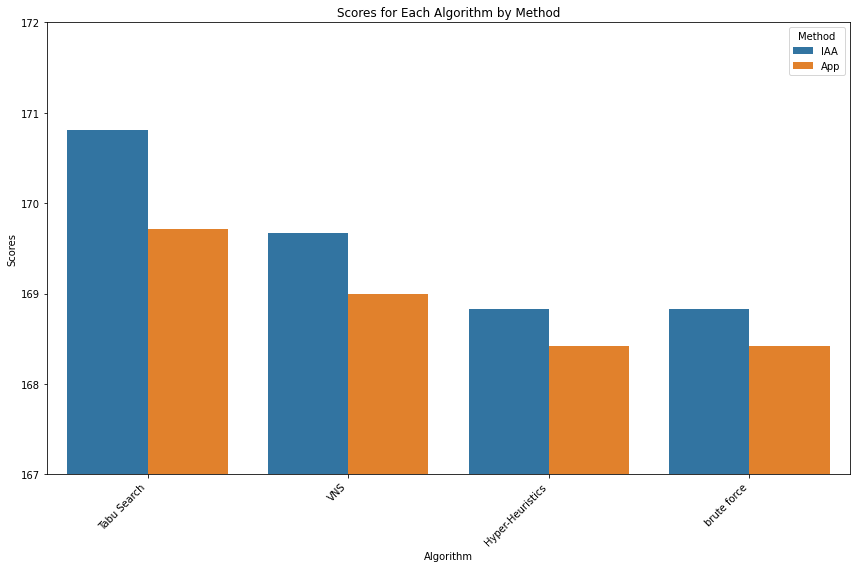

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_exploded is your DataFrame
df = df_exploded.copy()

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Algorithm', y='Score', hue='Method', data=df, ci=None)
plt.title('Scores for Each Algorithm by Method')
plt.xlabel('Algorithm')
plt.ylabel('Scores')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Method')

# Set the lower limit of the y-axis
plt.ylim(167, 172)

plt.tight_layout()
plt.show()


In [89]:
df

,Algorithm,Method,Athletes,Score
4,Tabu Search,IAA,simone biles,170.813000
4,Tabu Search,IAA,jordan chiles,170.813000
4,Tabu Search,IAA,shilese jones,170.813000
4,Tabu Search,IAA,ashlee sullivan,170.813000
5,Tabu Search,App,joscelyn roberson,169.719089
5,Tabu Search,App,zoe miller,169.719089
5,Tabu Search,App,simone biles,169.719089
5,Tabu Search,App,shilese jones,169.719089
0,VNS,IAA,jordan chiles,169.671750
0,VNS,IAA,shilese jones,169.671750


In [92]:
counts = pd.read_csv('Competition/top_countries.csv')

In [94]:
counts = counts.drop(columns=['Algorithm', 'Athletes'])

In [95]:
counts

,Country,Score
0,Great Britain,167.763
1,France,164.763
2,China,166.965
3,Canada,159.562
4,Brazil,164.995


In [102]:
df=df.drop(columns=['Athletes'])

In [103]:
df

,Algorithm,Method,Score
0,VNS,IAA,169.671750
1,VNS,App,168.998125
2,Hyper-Heuristics,IAA,168.829000
3,Hyper-Heuristics,App,168.422350
4,Tabu Search,IAA,170.813000
5,Tabu Search,App,169.719089
6,brute force,IAA,168.829000
7,brute force,App,168.422350


In [104]:
df=df.sort_values(by='Score', ascending=False)

In [105]:
df

,Algorithm,Method,Score
4,Tabu Search,IAA,170.813000
5,Tabu Search,App,169.719089
0,VNS,IAA,169.671750
1,VNS,App,168.998125
2,Hyper-Heuristics,IAA,168.829000
6,brute force,IAA,168.829000
3,Hyper-Heuristics,App,168.422350
7,brute force,App,168.422350


In [107]:
counts

,Country,Score
0,Great Britain,167.763
1,France,164.763
2,China,166.965
3,Canada,159.562
4,Brazil,164.995


In [109]:
counts['Country'].unique()

array(['Great Britain', 'France', 'China', 'Canada', 'Brazil'],
      dtype=object)